An  overall  introduction  to  your  project,  including  the  topic  and  tasks.   (5  pts)

•    At   least   one   data   visualization   for   the   overall   data   with   clear   title,    labels,    legend(if   need)   and   a paragraph  to  introduce  the  data,  including  the  size,  source  and  attributes.   (10  pts)

•    At  least  two  links  to  the  references.   (5  pts)

•    At  least  three  static  data  visualization,   each  with  clear  title,   labels,   legend(if  need)  and  a  paragraph to  explain  the  takeaway  of  the  visualization.   (30  pts)

•    At  least  two  interactive  data  visualization,  each  with  clear  title,  labels,  legend(if  need)  and  a  paragraph to  explain  how  to  interact  with  the  visualization.(30  pts)

•    A  summary  for  your  findings,  including  what  you  have  learned  from  the  data  visualization  and  what can  be  done  in  the  future.   (15  pts)

•    Format,   including   correctly   publish   the   website,   no   grammar   error   and   keep   the   webpage   tidy   and clear.(5  pts)

In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("v7_Latest_Data_Science_Salaries.csv")
df.sample()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
1126,Data Scientist,Full-Time,Mid,Intermediate,100000,United States Dollar,United States,100000,United States,Medium,2023


In [3]:
top_30_job_title = df["Job Title"].value_counts()[:30]
top_30_job_title

Job Title
Data Engineer                               1097
Data Scientist                              1051
Data Analyst                                 772
Machine Learning Engineer                    542
Analytics Engineer                           218
Research Scientist                           177
Data Architect                               149
Research Engineer                            113
ML Engineer                                  102
Data Science Manager                          83
Applied Scientist                             82
Business Intelligence Analyst                 74
Machine Learning Scientist                    64
Business Intelligence Engineer                64
Data Manager                                  63
Research Analyst                              57
AI Engineer                                   46
Data Science                                  39
Data Specialist                               39
Data Science Consultant                       38
BI Develop

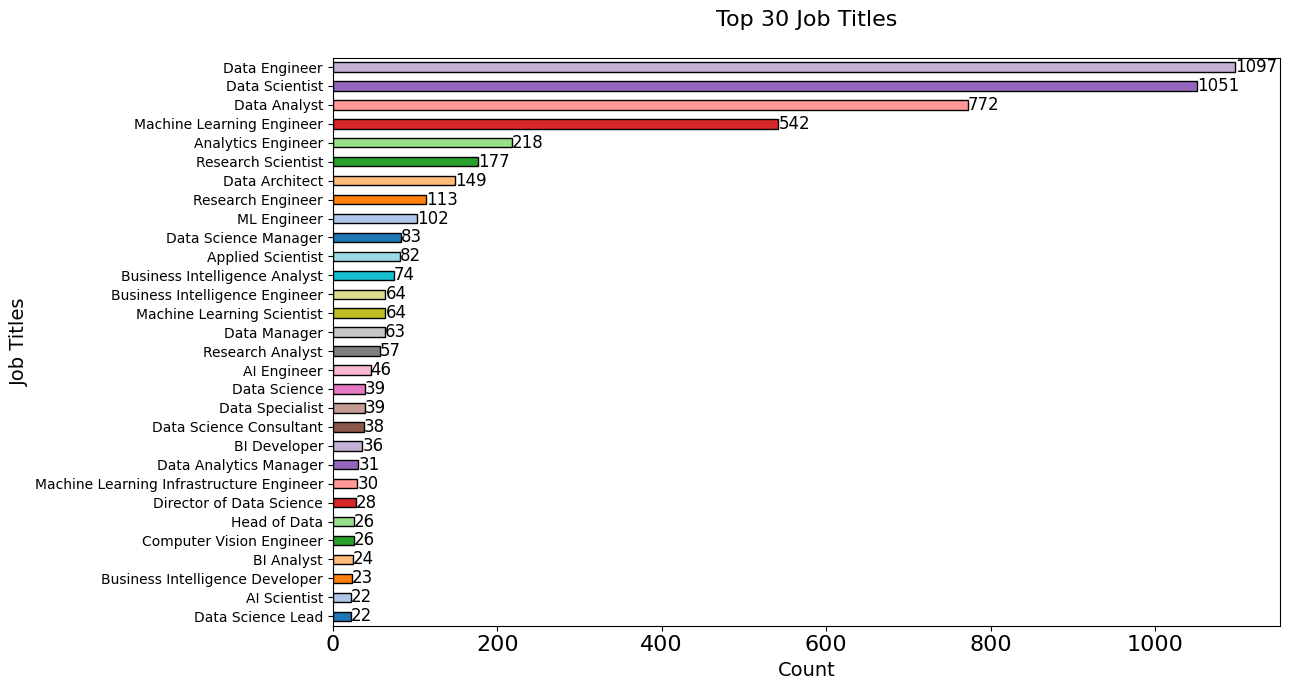

In [4]:
# Assuming top_30_job_title is a Series with counts of the top 30 job titles, let's simulate it
# Since the specific series top_30_job_title is not defined, let's generate a similar example
top_30_job_title_example = df['Job Title'].value_counts().nlargest(30)

plt.figure(figsize=(13, 7))
ax = top_30_job_title_example.sort_values(ascending=True).plot(kind='barh', color=sns.color_palette('tab20'), edgecolor='black')
plt.ylabel('Job Titles', fontsize=14)
plt.xlabel('Count', fontsize=14)
plt.title('Top 30 Job Titles\n', fontsize=16)
plt.xticks(rotation=0, ha='center', fontsize=16)

# Adding data labels
for index, value in enumerate(top_30_job_title_example.sort_values(ascending=True)):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=12)

plt.tight_layout()
plt.savefig('Top30.png') 
plt.show()

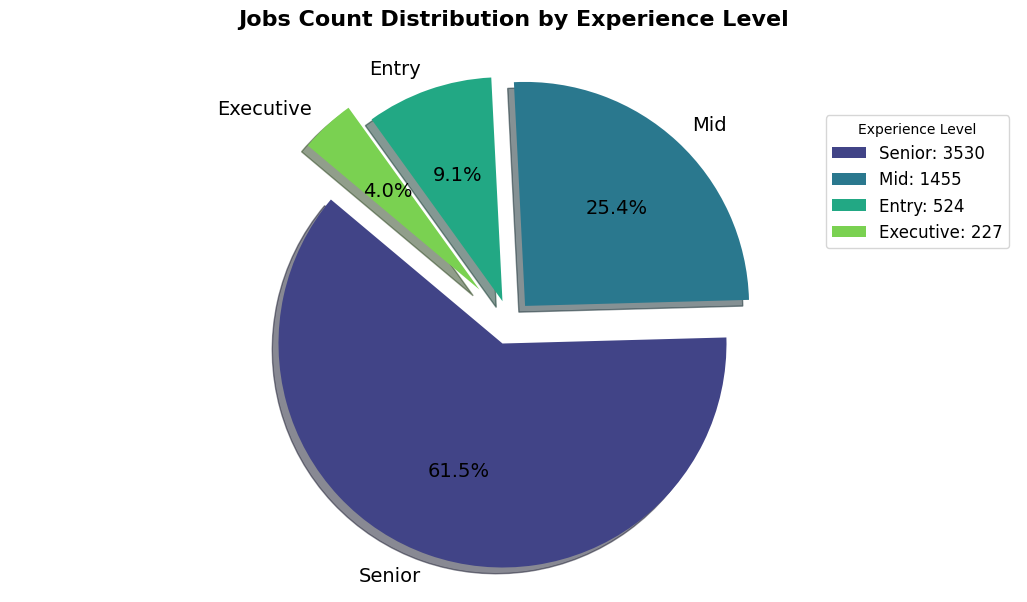

In [5]:
plt.figure(figsize=(13, 7))

counts = df["Experience Level"].value_counts()
explode = (0.1, 0.1, 0.1, 0.2)  # Slightly separate the slices

counts.plot(kind='pie', explode=explode, fontsize=14, autopct='%1.1f%%', shadow=True, startangle=140, colors=sns.color_palette("viridis", len(counts)))
plt.ylabel('')  # Hide the 'Experience Level' ylabel generated by default
plt.axis('equal')  # Ensures pie chart is a circle
plt.legend(labels=[f'{label}: {count}' for label, count in counts.items()], title="Experience Level", bbox_to_anchor=(1, 0.9), fontsize=12)
plt.title('Jobs Count Distribution by Experience Level', weight="bold", fontsize=16, pad=20)
plt.savefig('pie.png')
plt.show()


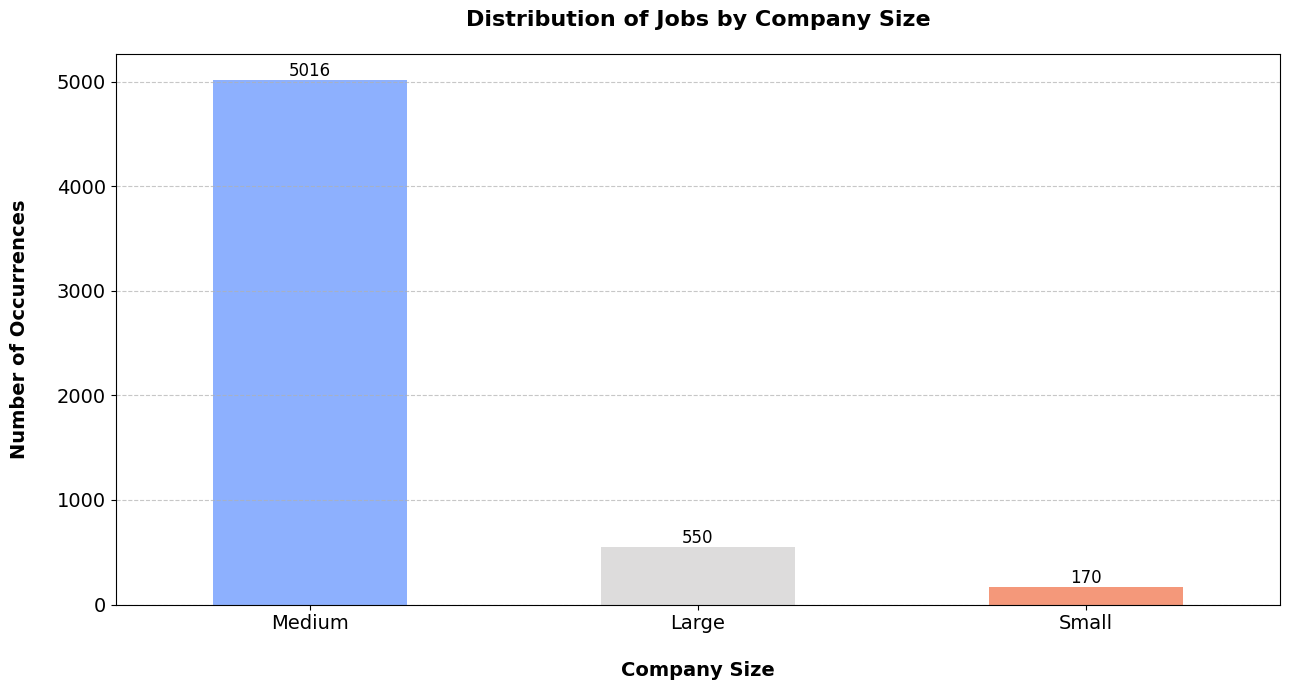

In [6]:
plt.figure(figsize=(13, 7))
ax = df["Company Size"].value_counts().plot(kind='bar', rot=0, color=sns.color_palette("coolwarm", len(df["Company Size"].unique())))
ax.set_xticklabels(['Medium', 'Large', 'Small'], fontsize=12)

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12)

plt.xlabel('Company Size', weight="bold", fontsize=14, labelpad=20)
plt.ylabel('Number of Occurrences', weight="bold", fontsize=14, labelpad=20)
plt.title('Distribution of Jobs by Company Size', weight='bold', fontsize=16, pad=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('barchart.png')
plt.show()


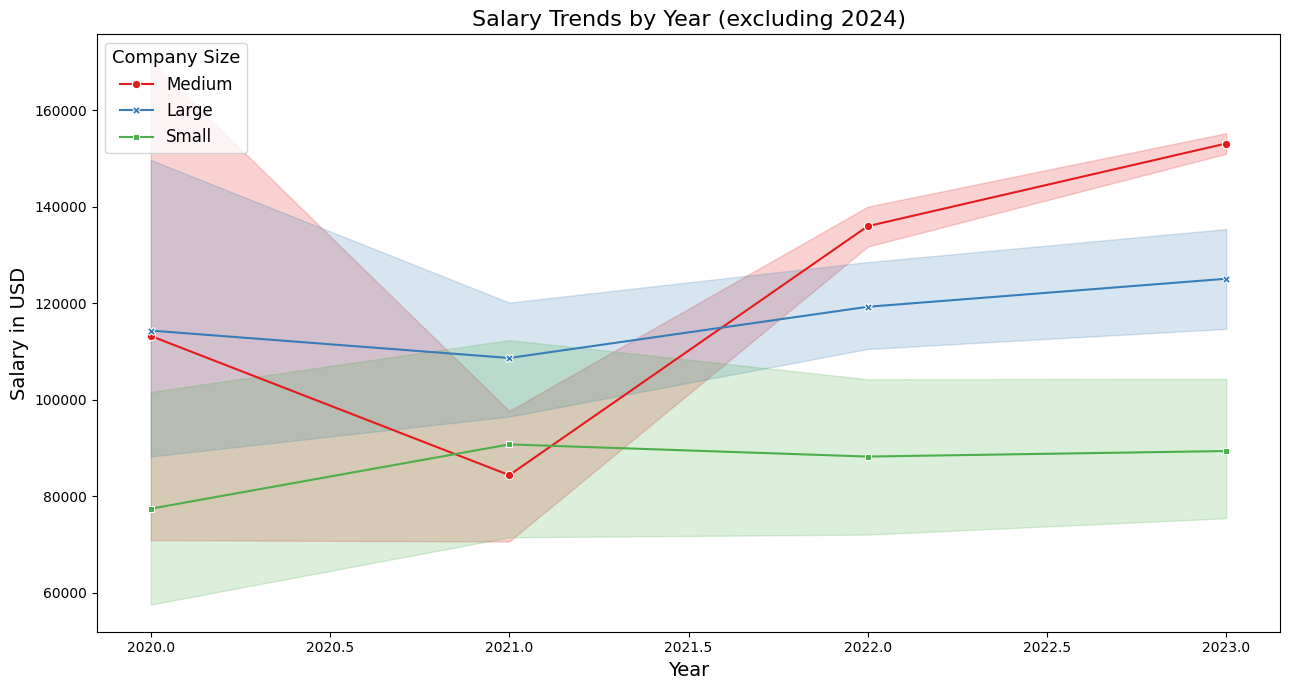

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out the data for the year 2024
df_filtered = df[df['Year'] != 2024]

# Now, create the line plot without the data for 2024
plt.figure(figsize=(13, 7))
sns.lineplot(
    x='Year', 
    y='Salary in USD', 
    hue='Company Size', 
    data=df_filtered, 
    palette='Set1', 
    style='Company Size', 
    markers=True, 
    dashes=False
)

plt.title('Salary Trends by Year (excluding 2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Salary in USD', fontsize=14)
plt.legend(title='Company Size', title_fontsize='13', fontsize='12')
plt.tight_layout()  # Use tight_layout to automatically adjust subplot params
plt.savefig('Trend_excluding_2024.png')
plt.show()


In [8]:
import altair as alt

alt_boxplot = alt.Chart(df).mark_boxplot(size=50).encode(
    x='Employment Type:N',
    y='Salary in USD:Q',
    color='Employment Type:N',
    tooltip=['Employment Type:N', 'Salary in USD:Q', 'Job Title:N']
).properties(
    width=750, 
    height=550,  
    title='Salary Distribution by Employment Type'
).configure_axis(
    labelFontSize=20,
    titleFontSize=20
)

# Save the plot as an HTML file
alt_boxplot.save('altair_box_plot.html')



In [9]:
import plotly.express as px
import pandas as pd

# Filtering for the top 30 most frequent job titles
top_20_titles = df['Job Title'].value_counts().head(20).index
filtered_df = df[df['Job Title'].isin(top_20_titles)]

# Aggregating the data to show the average salary for each job title and experience level
agg_df = filtered_df.groupby(['Job Title', 'Experience Level'], as_index=False)['Salary in USD'].mean()

# Creating an interactive scatter plot with aggregated data for the top 30 most frequent job titles
fig = px.scatter(agg_df, x="Job Title", y="Salary in USD",
                 color="Experience Level", size="Salary in USD",
                 hover_data=['Job Title', 'Experience Level'],
                 title="Median Salary Analysis for Top 20 Most Common Job Titles by Experience Level",
                 size_max=18)

# Improving layout for better readability
fig.update_layout(xaxis={'categoryorder':'total descending', 'tickangle':-45},
                  height=600)

fig.show()
fig.write_html('scatter.html')



In [15]:
import plotly.express as px
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Assuming 'country_stats' is already prepared as per your description
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='choropleth-map'),
    html.P("Adjust Maximum Color Value:"),
    dcc.Slider(
        id='color-range-slider',
        min=0,
        max=500000,  # Set this to a maximum reasonable for your dataset
        value=250000,  # Default value
        step=5000,  # Increment steps
        marks={i: '{}k'.format(i//1000) for i in range(0, 500001, 50000)},  # Label marks for easier understanding
    )
])

@app.callback(
    Output('choropleth-map', 'figure'),
    [Input('color-range-slider', 'value')]
)
def update_figure(selected_max_color):
    fig = px.choropleth(
        country_stats,
        locations="Employee Residence",
        locationmode="country names",
        color="median",
        hover_name="Employee Residence",
        hover_data={"median": ":,.0f", "mean": ":,.0f", "std": ":,.0f", "min": ":,.0f", "25%": ":,.0f", "75%": ":,.0f", "max": ":,.0f", "count": ":,.0f"},
        title="Enhanced Descriptive Statistics of Jobs by Country",
        color_continuous_scale=px.colors.sequential.Viridis,
        range_color=(0, selected_max_color)
    )
    fig.update_layout(
        coloraxis_colorbar=dict(title="Median Salary in USD"),
        height=800,
        width=1500
    )
    return fig
fig.write_html('map.html')

if __name__ == '__main__':
    app.run_server(debug=True)
